In [3]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as jr

from _gbm import simulate_gbm

Here is some markdown text

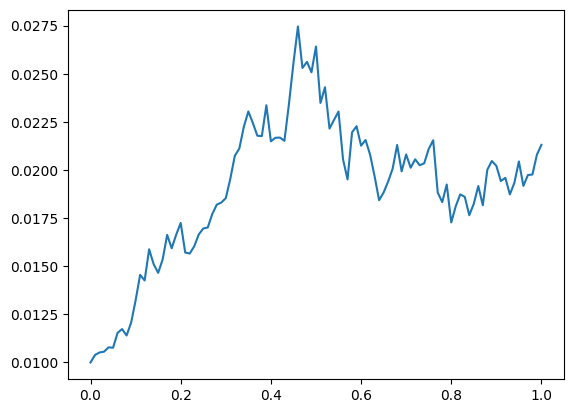

In [4]:
sol = simulate_gbm(1.0, 0.5, 1.0, 0.01, jnp.array([0.01]), jr.key(1))
plt.plot(sol.ts, sol.ys)
plt.show()